<a href="https://colab.research.google.com/github/roymalini/Quant-Wing-2020/blob/master/Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
from pandas_datareader import data as web
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#importing libraries
import pandas as pd
import pandas_datareader.data as pdr
import datetime


#importing top 20 stocks on S&P 500 as of today
assets = ['AAPL', 'MSFT','AMAZ', 'GOOG','GOOGL', 'FB', 'XOM', 'JNJ','V', 'PG','JPM','UNH','MA','INTC','VZ','HD','T','PFE','MRK','PEP']
tickers = assets

stock_cp = pd.DataFrame() # dataframe to store close price of each ticker
attempt = 0 # initializing passthrough variable
drop = [] # initializing list to store tickers whose close price was successfully extracted
while len(tickers) != 0 and attempt <= 5:
    tickers = [j for j in tickers if j not in drop] # removing stocks whose data has been extracted from the ticker list
    for i in range(len(tickers)):
        try:
            temp = pdr.get_data_yahoo(tickers[i],datetime.date.today()-datetime.timedelta(1095),datetime.date.today())
            temp.dropna(inplace = True)
            stock_cp[tickers[i]] = temp["Adj Close"]
            drop.append(tickers[i])       
        except:
            print(tickers[i]," :failed to fetch data...retrying")
            continue
    attempt+=1

In [3]:
#stock_cp contains all adj close price
stock_cp

,AAPL,MSFT,AMAZ,GOOG,GOOGL,FB,XOM,JNJ,V,PG,JPM,UNH,MA,INTC,VZ,HD,T,PFE,MRK,PEP
Date,,,,,,,,,,,,,,,,,,,,
2017-08-21,151.003662,69.157600,0.32702,906.659973,920.869995,167.779999,65.767456,123.156357,101.232948,84.978050,83.189903,183.407059,129.751877,32.470844,42.188114,138.725632,31.423334,29.334024,56.699253,108.054352
2017-08-22,153.472183,70.125717,0.45780,924.690002,940.400024,169.639999,66.077438,124.309914,102.066597,84.914001,84.043549,186.043106,131.581039,32.219780,42.372143,139.385788,31.757801,29.683243,57.110973,107.743698
2017-08-23,153.664276,69.703972,0.45000,927.000000,942.580017,168.710007,65.965485,122.556480,101.193733,84.593704,84.144531,185.517792,130.863113,32.229080,42.310799,138.632675,31.707630,29.763838,56.863949,107.168053
2017-08-24,152.982300,69.675201,0.37000,921.280029,936.890015,167.740005,65.724396,122.639519,101.232948,84.438133,84.006836,186.004883,130.754974,32.275574,42.337097,137.842331,31.506952,29.754877,57.376312,106.190399
2017-08-25,153.549042,69.799805,0.45000,915.890015,930.500000,166.320007,66.060204,122.295906,101.360458,84.657768,84.346458,185.632431,130.548462,32.238377,42.661339,139.144043,31.766165,29.898146,57.586739,105.852333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-11,437.500000,203.380005,0.00640,1480.319946,1480.540039,256.130005,44.100002,146.970001,197.471466,133.229996,103.820000,315.549988,328.540009,48.189999,58.509998,274.920013,30.200001,37.790001,80.910004,135.119995
2020-08-12,452.040009,209.190002,0.00680,1506.619995,1507.239990,259.890015,44.090000,149.660004,198.440002,135.460007,102.940002,322.269989,327.630005,49.189999,58.599998,281.579987,30.180000,38.330002,82.680000,137.800003
2020-08-13,460.040009,208.699997,0.00630,1518.449951,1516.650024,261.299988,43.009998,148.000000,197.580002,135.779999,102.370003,321.519989,326.190002,48.560001,58.520000,281.660004,29.910000,38.169998,83.540001,138.100006


In [4]:
#finding out correlation
stock_cp.corr()  

,AAPL,MSFT,AMAZ,GOOG,GOOGL,FB,XOM,JNJ,V,PG,JPM,UNH,MA,INTC,VZ,HD,T,PFE,MRK,PEP
AAPL,1.000000,0.937285,-0.680434,0.910189,0.908235,0.772157,-0.727763,0.736850,0.822000,0.756270,0.298113,0.818758,0.820645,0.703707,0.630773,0.886019,0.331944,0.104626,0.602131,0.746695
MSFT,0.937285,1.000000,-0.804663,0.902889,0.894623,0.702410,-0.750657,0.746963,0.936109,0.867515,0.318038,0.827453,0.932014,0.777487,0.783054,0.910366,0.317884,0.221450,0.770870,0.860109
AMAZ,-0.680434,-0.804663,1.000000,-0.602893,-0.595278,-0.334818,0.624478,-0.556495,-0.805581,-0.797618,-0.155560,-0.625021,-0.795176,-0.513411,-0.778204,-0.653762,-0.163602,-0.365268,-0.842743,-0.742207
GOOG,0.910189,0.902889,-0.602893,1.000000,0.999389,0.785218,-0.543946,0.703168,0.875089,0.738094,0.509073,0.834486,0.872306,0.822011,0.695885,0.919991,0.408606,0.203986,0.646264,0.771844
GOOGL,0.908235,0.894623,-0.595278,0.999389,1.000000,0.788600,-0.532847,0.701468,0.865022,0.725968,0.503556,0.834381,0.861816,0.813453,0.684906,0.915127,0.398502,0.205427,0.635098,0.760632
FB,0.772157,0.702410,-0.334818,0.785218,0.788600,1.000000,-0.427025,0.492138,0.636340,0.561475,0.301621,0.546358,0.640560,0.556327,0.329097,0.787755,0.373110,-0.116640,0.336350,0.598607
XOM,-0.727763,-0.750657,0.624478,-0.543946,-0.532847,-0.427025,1.000000,-0.485439,-0.534506,-0.590952,0.188369,-0.510154,-0.533326,-0.492409,-0.379719,-0.536017,-0.074142,0.205187,-0.380294,-0.528395
JNJ,0.736850,0.746963,-0.556495,0.703168,0.701468,0.492138,-0.485439,1.000000,0.673863,0.707710,0.258598,0.717657,0.655155,0.548589,0.672105,0.638101,0.263278,0.378730,0.621061,0.741748
V,0.822000,0.936109,-0.805581,0.875089,0.865022,0.636340,-0.534506,0.673863,1.000000,0.892320,0.534175,0.783086,0.996661,0.782206,0.876020,0.906370,0.442045,0.361400,0.884695,0.905549
PG,0.756270,0.867515,-0.797618,0.738094,0.725968,0.561475,-0.590952,0.707710,0.892320,1.000000,0.390847,0.597511,0.888632,0.602453,0.861765,0.799073,0.543593,0.220179,0.887561,0.964724


In [5]:
#choosing 5 stocks
from sklearn.cluster import SpectralBiclustering

model = SpectralBiclustering(n_clusters=5, method='log', random_state=0)
model.fit(stock_cp.corr())


asset_srt = np.array(assets)
sorted = np.argsort(model.row_labels_)

for i in range(len(model.row_labels_)):
  asset_srt[i] = assets[sorted[i]]

stocks = asset_srt[7:12]

In [6]:
#final stocks list with least corelated stocks
stocks

array(['XOM', 'PFE', 'T', 'JPM', 'VZ'], dtype='<U5')

In [7]:
stock_cp = stock_cp[stocks]
stock_cp

,XOM,PFE,T,JPM,VZ
Date,,,,,
2017-08-21,65.767456,29.334024,31.423334,83.189903,42.188114
2017-08-22,66.077438,29.683243,31.757801,84.043549,42.372143
2017-08-23,65.965485,29.763838,31.707630,84.144531,42.310799
2017-08-24,65.724396,29.754877,31.506952,84.006836,42.337097
2017-08-25,66.060204,29.898146,31.766165,84.346458,42.661339
...,...,...,...,...,...
2020-08-11,44.100002,37.790001,30.200001,103.820000,58.509998
2020-08-12,44.090000,38.330002,30.180000,102.940002,58.599998
2020-08-13,43.009998,38.169998,29.910000,102.370003,58.520000


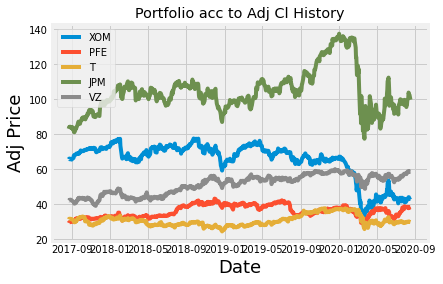

In [8]:
#plotting 5 stocks according to Adj close price history
title='Portfolio acc to Adj Cl History'
for c in stock_cp.columns.values:
  plt.plot(stock_cp[c],label=c)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Price',fontsize=18)
plt.legend(stock_cp.columns ,loc='upper left')
plt.show()

In [9]:
#calculating returns
returns=stock_cp.pct_change()
returns

,XOM,PFE,T,JPM,VZ
Date,,,,,
2017-08-21,NaN,NaN,NaN,NaN,NaN
2017-08-22,0.004713,0.011905,0.010644,0.010261,0.004362
2017-08-23,-0.001694,0.002715,-0.001580,0.001202,-0.001448
2017-08-24,-0.003655,-0.000301,-0.006329,-0.001636,0.000622
2017-08-25,0.005109,0.004815,0.008227,0.004043,0.007659
...,...,...,...,...,...
2020-08-11,0.010335,-0.015629,0.000000,0.031598,-0.008137
2020-08-12,-0.000227,0.014290,-0.000662,-0.008476,0.001538
2020-08-13,-0.024495,-0.004174,-0.008946,-0.005537,-0.001365


In [10]:
#create cov matrix
cov_matrix=returns.cov()*252
cov_matrix

,XOM,PFE,T,JPM,VZ
XOM,0.098098,0.033535,0.046478,0.075116,0.026298
PFE,0.033535,0.059566,0.033822,0.042376,0.025970
T,0.046478,0.033822,0.072082,0.057825,0.037313
JPM,0.075116,0.042376,0.057825,0.114456,0.031928
VZ,0.026298,0.025970,0.037313,0.031928,0.043888


In [11]:
#calculating portfolio varience
weights=np.array([0.2,0.2,0.2,0.2,0.2])
port_var= np.dot(weights.T,np.dot(cov_matrix,weights))
port_var

0.04837654011724527

In [12]:
#annual return
portfoliosum=np.sum(returns.mean()*weights) *252
portfoliosum

0.05877089969590573

In [13]:
#volatility
port_volatility=np.sqrt(port_var)
port_volatility

0.21994667562217274

In [ ]:
#expected annual return, volatility,varience
percent_var=str(round(port_var,2)*100)+'%'
percent_volatility=str(round(port_volatility,2)*100)+'%'
percent_return=str(round(portfoliosum,2)*100)+'%'
print('Expected annual return ' +percent_return)
print('Annual volatility ' +percent_return)
print('Annual varience ' +percent_return)


Expected annual return 20.0%
Annual volatility 20.0%
Annual varience 20.0%


In [14]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 2.1MB/s 


In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [16]:
#portfolio optimisation

mu=expected_returns.mean_historical_return(stock_cp)
S=risk_models.sample_cov(stock_cp)

#optimise for max sharpe ratio
ef = EfficientFrontier(mu, S,(-1,1))
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('XOM', -1.0), ('PFE', 0.76017), ('T', -0.64165), ('JPM', 0.88147), ('VZ', 1.0)])
Expected annual return: 41.2%
Annual volatility: 35.3%
Sharpe Ratio: 1.11


(0.41162304706158603, 0.3534490399231329, 1.1080042745249925)